In [52]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [53]:
#load in csv for movies and tv shows
cleaned_movie = pd.read_csv("Output/movie_df.csv")
del cleaned_movie["Unnamed: 0"]
cleaned_movie = cleaned_movie.drop_duplicates()
#cleaned_movie

In [54]:
cleaned_tv = pd.read_csv("Output/show_df.csv")
del cleaned_tv["Unnamed: 0"]
cleaned_tv = cleaned_tv.drop_duplicates()
#cleaned_tv

In [55]:
#load in netflix dataframe
netflix_df = pd.read_csv("Output/netflix_df.csv")
del netflix_df["Unnamed: 0"]
netflix_df = netflix_df.drop_duplicates()
#netflix_df

In [56]:
netflix_movie_ratings = netflix_df[netflix_df.type=="MOVIE"]
netflix_movie_ratings = netflix_movie_ratings['age_certification'].value_counts()
netflix_movie_ratings = pd.DataFrame(netflix_movie_ratings).reset_index().rename(columns={"index":"rating", "age_certification":"count"}).sort_values("rating")
#netflix_movie_ratings

In [57]:
netflix_tv_ratings = netflix_df[netflix_df.type=="SHOW"]
netflix_tv_ratings = netflix_tv_ratings['age_certification'].value_counts()
netflix_tv_ratings = pd.DataFrame(netflix_tv_ratings).reset_index().rename(columns={"index":"rating", "age_certification":"count"}).sort_values("rating")
#netflix_tv_ratings

In [58]:
#load in hulu dataframe
hulu_df = pd.read_csv("Output/hulu_df.csv")
del hulu_df["Unnamed: 0"]
hulu_df = hulu_df.drop_duplicates()
#hulu_df

In [59]:
hulu_movie_ratings = hulu_df[hulu_df.type=="MOVIE"]
hulu_movie_ratings = hulu_movie_ratings['age_certification'].value_counts()
hulu_movie_ratings = pd.DataFrame(hulu_movie_ratings).reset_index().rename(columns={"index":"rating", "age_certification":"count"}).sort_values("rating")
#hulu_movie_ratings

In [60]:
hulu_tv_ratings = hulu_df[hulu_df.type=="SHOW"]
hulu_tv_ratings = hulu_tv_ratings['age_certification'].value_counts()
hulu_tv_ratings = pd.DataFrame(hulu_tv_ratings).reset_index().rename(columns={"index":"rating", "age_certification":"count"}).sort_values("rating")
#hulu_tv_ratings

In [10]:
# hulu_ratings = hulu_df['age_certification'].value_counts()
# hulu_ratings = pd.DataFrame(hulu_ratings).reset_index().rename(columns={"index":"rating", "age_certification":"count"}).sort_values("rating")
# hulu_ratings

In [61]:
#load in hbo dataframe
hbo_df = pd.read_csv("Output/hbo_df.csv")
del hbo_df["Unnamed: 0"]
hbo_df = hbo_df.drop_duplicates()
#hbo_df

In [62]:
hbo_movie_ratings = hbo_df[hbo_df.type=="MOVIE"]
hbo_movie_ratings = hbo_movie_ratings['age_certification'].value_counts()
hbo_movie_ratings = pd.DataFrame(hbo_movie_ratings).reset_index().rename(columns={"index":"rating", "age_certification":"count"}).sort_values("rating")
#hbo_movie_ratings

In [63]:
hbo_tv_ratings = hbo_df[hbo_df.type=="SHOW"]
hbo_tv_ratings = hbo_tv_ratings['age_certification'].value_counts()
hbo_tv_ratings = pd.DataFrame(hbo_tv_ratings).reset_index().rename(columns={"index":"rating", "age_certification":"count"}).sort_values("rating")
#hbo_tv_ratings

In [14]:
# hbo_ratings = hbo_df['age_certification'].value_counts()
# hbo_ratings = pd.DataFrame(hbo_ratings).reset_index().rename(columns={"index":"rating", "age_certification":"count"}).sort_values("rating")
# hbo_ratings

The r value is: 0.14


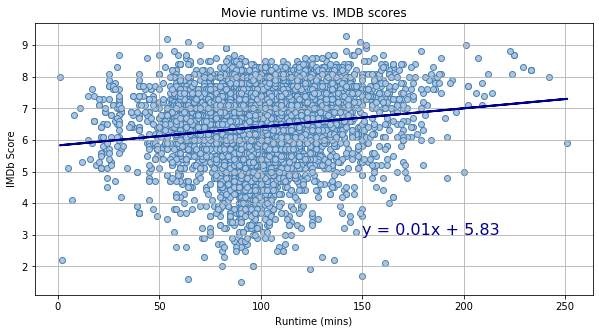

In [15]:
#score vs. movie runtime graph
x_value = cleaned_movie["runtime"]
y_value = cleaned_movie["imdb_score"]
plt.figure(figsize=(10,5))
plt.scatter(x_value,y_value, marker="o", color="lightsteelblue", edgecolors="steelblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"darkblue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(150,3),color="darkblue",fontsize=16)
print(f"The r value is: {round(rvalue,2)}")
plt.title("Movie runtime vs. IMDB scores")
plt.xlabel("Runtime (mins)")
plt.ylabel("IMDb Score")
plt.savefig("Output/runtime_vs_score.png")
plt.show()

There is a very weak positive correlation between a movie's runtime and its IMDb score.

The r value is: 0.01


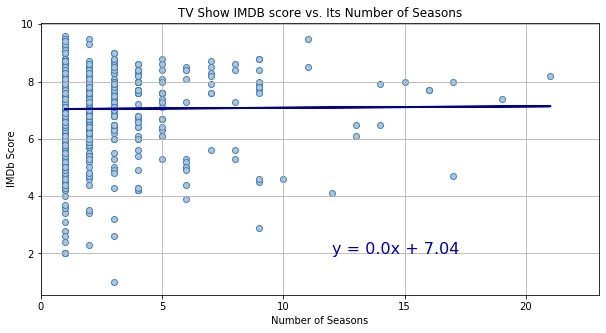

In [16]:
#score vs. season graph
x_value = cleaned_tv["seasons"]
y_value = cleaned_tv["imdb_score"]
plt.figure(figsize=(10,5))
plt.scatter(x_value,y_value, marker="o", color="lightsteelblue", edgecolors="steelblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"darkblue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(12,2),color="darkblue",fontsize=16)
plt.title("TV Show IMDB score vs. Its Number of Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("IMDb Score")
plt.xlim(0, max(x_value)+2)
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("Output/seasons_vs_score.png")
plt.show()

There is almost no correlation between a show's IMDb score and the number of seasons it aired.

In [64]:
director_df = cleaned_movie[cleaned_movie["role"]=="DIRECTOR"]
#director_df

In [65]:
#use groupby to match director with avg imdb score
group_director = director_df.groupby("name")
avg_score = group_director.mean().reset_index()
avg_score = avg_score[["name","imdb_score"]]
#avg_score

In [66]:
#use previous dataframe to get the number of movies each director has made
director_movie = group_director.count().reset_index()
director_movie = director_movie[["name","title"]]
#director_movie

In [67]:
#merge the two dataframes together and filter out directors with less than 4 movies
final_director = pd.merge(director_movie, avg_score, how="outer", on=["name"])
final_director = final_director[final_director["title"]>4]
final_director = final_director[final_director["imdb_score"]>7.4]
final_director = final_director[["name","imdb_score"]]
final_director = final_director.sort_values("imdb_score",ascending=False)
#final_director.reset_index()

Christopher Nolan has the highest average IMDb score with: 8.180000000000001


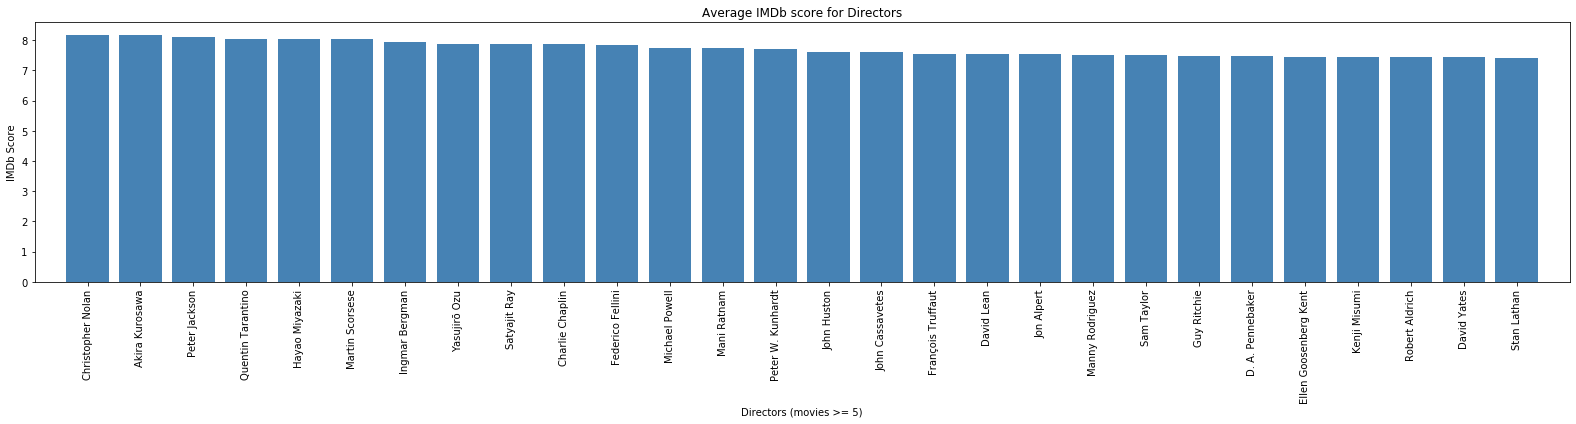

In [43]:
#create bar graph displaying director scores
x_axis = final_director["name"]
plt.figure(figsize=(22,6))
plt.bar(final_director["name"],final_director["imdb_score"],color="steelblue")
plt.xticks(rotation=90)
plt.title("Average IMDb score for Directors")
plt.xlabel("Directors (movies >= 5)")
plt.ylabel("IMDb Score")
print(f"{final_director.iloc[0,0]} has the highest average IMDb score with: {final_director.max(numeric_only=True).max()}")
plt.xlim(-1, len(x_axis))
plt.tight_layout()
plt.savefig("Output/director_score.png")
plt.show()

In [72]:
nolan_df = cleaned_movie[cleaned_movie["name"]=="Christopher Nolan"]
nolan_df = nolan_df.sort_values("imdb_score", ascending=False)
#nolan_df.reset_index()

,index,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,name,role,release_year,seasons,imdb_score,imdb_votes
0,5654,tm56184,0.0,0.0,1.0,The Dark Knight,MOVIE,PG-13,152,Christopher Nolan,DIRECTOR,2008,0.0,9.0,2555504.0
1,180,tm92641,1.0,0.0,0.0,Inception,MOVIE,PG-13,148,Christopher Nolan,DIRECTOR,2010,0.0,8.8,2294231.0
2,5664,tm92641,0.0,0.0,1.0,Inception,MOVIE,PG-13,148,Christopher Nolan,DIRECTOR,2010,0.0,8.8,2268288.0
3,470,tm39888,1.0,0.0,0.0,The Dark Knight Rises,MOVIE,PG-13,165,Christopher Nolan,DIRECTOR,2012,0.0,8.4,1669067.0
4,5392,tm19313,0.0,0.0,1.0,Memento,MOVIE,R,113,Christopher Nolan,DIRECTOR,2000,0.0,8.4,1205770.0
5,5658,tm167206,0.0,0.0,1.0,Batman Begins,MOVIE,PG-13,140,Christopher Nolan,DIRECTOR,2005,0.0,8.2,1426616.0
6,1156,tm232797,1.0,0.0,0.0,Dunkirk,MOVIE,PG-13,107,Christopher Nolan,DIRECTOR,2017,0.0,7.8,619645.0
7,6547,tm232797,0.0,0.0,1.0,Dunkirk,MOVIE,PG-13,107,Christopher Nolan,DIRECTOR,2017,0.0,7.8,619645.0
8,6688,tm455670,0.0,0.0,1.0,Tenet,MOVIE,PG-13,150,Christopher Nolan,DIRECTOR,2020,0.0,7.4,453712.0
9,5714,tm108332,0.0,0.0,1.0,Insomnia,MOVIE,R,118,Christopher Nolan,DIRECTOR,2002,0.0,7.2,290729.0


In [69]:
#filter dataframe to show Akira Kurosawa's movies
akira_df = cleaned_movie[cleaned_movie["name"]=="Akira Kurosawa"]
akira_df = akira_df.sort_values("imdb_score", ascending=False)
#akira_df.reset_index()

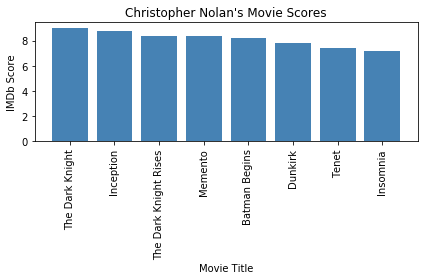

The Dark Knight is Christopher Nolan's highest scoring film.


In [70]:
#create bar graph that shows Christopher Nolan's movies and their scores
plt.bar(nolan_df["title"],nolan_df["imdb_score"],color="steelblue")
plt.xticks(rotation=90)
plt.title("Christopher Nolan's Movie Scores")
plt.xlabel("Movie Title")
plt.ylabel("IMDb Score")
plt.tight_layout()
plt.savefig("Output/nolan_score.png")
plt.show()
print(f"{nolan_df.iloc[0,4]} is {nolan_df.iloc[0,8]}'s highest scoring film.")

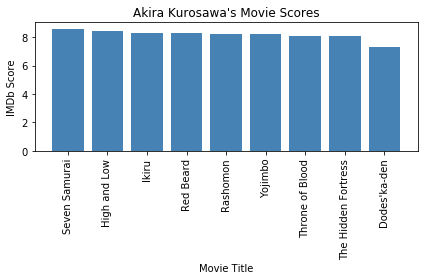

Seven Samurai is Akira Kurosawa's highest scoring film.


In [71]:
#create bar graph that shows Akira Kurosawa's movies and their scores
plt.bar(akira_df["title"],akira_df["imdb_score"],color="steelblue")
plt.xticks(rotation=90)
plt.title("Akira Kurosawa's Movie Scores")
plt.xlabel("Movie Title")
plt.ylabel("IMDb Score")
plt.tight_layout()
plt.savefig("Output/kurosawa_score.png")
plt.show()
print(f"{akira_df.iloc[0,4]} is {akira_df.iloc[0,8]}'s highest scoring film.")

In [48]:
#netflix_movie_ratings
#hulu_movie_ratings
#hbo_movie_ratings

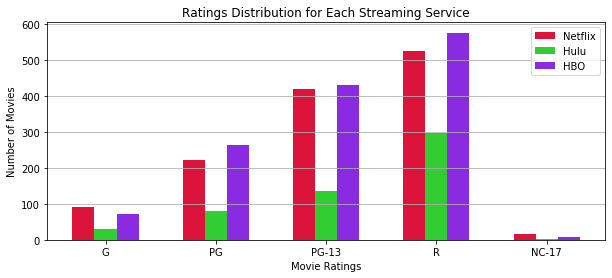

In [27]:
#create bar graphs comparing age certifications within each streaming service
ratings_m = ["G", "PG", "PG-13", "R", "NC-17"]
y1 = [91, 221, 420, 525, 15]
y2 = [31, 80, 136, 298, 2]
y3 = [71, 264, 430, 576, 7]
x = np.arange(len(ratings_m))
width = 0.2
plt.figure(figsize=(10,4))
plt.bar(x - 0.2, y1, width, color="crimson")
plt.bar(x, y2, width, color="limegreen")
plt.bar(x + 0.2, y3, width, color="blueviolet")
plt.xticks(x, ["G", "PG", "PG-13", "R", "NC-17"])
plt.title("Ratings Distribution for Each Streaming Service")
plt.xlabel("Movie Ratings")
plt.ylabel("Number of Movies")
plt.legend(["Netflix", "Hulu", "HBO"])
plt.grid(b=True,which="major",axis="y")
plt.savefig("Output/movie_ratings_vs_service.png")
plt.show()

In [38]:
netflix_tv_ratings
#hulu_tv_ratings
#hbo_tv_ratings

,rating,count
1,TV-14,164
5,TV-G,12
0,TV-MA,290
2,TV-PG,52
3,TV-Y,46
4,TV-Y7,24


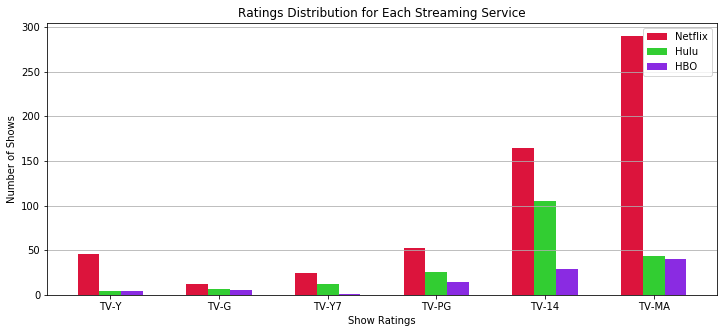

In [29]:
ratings_s = ["TV-Y", "TV-G", "TV-Y7", "TV-PG", "TV-14", "TV-MA"]
y1 = [46, 12, 24, 52, 164, 290]
y2 = [4, 6, 12, 25, 105, 43]
y3 = [4, 5, 1, 14, 29, 40]
x = np.arange(len(ratings_s))
width = 0.2
plt.figure(figsize=(12,5))
plt.bar(x - 0.2, y1, width, color="crimson")
plt.bar(x, y2, width, color="limegreen")
plt.bar(x + 0.2, y3, width, color="blueviolet")
plt.xticks(x, ["TV-Y", "TV-G", "TV-Y7", "TV-PG", "TV-14", "TV-MA", "NC-17"])
plt.title("Ratings Distribution for Each Streaming Service")
plt.xlabel("Show Ratings")
plt.ylabel("Number of Shows")
plt.legend(["Netflix", "Hulu", "HBO"])
plt.grid(b=True,which="major",axis="y")
plt.savefig("Output/tv_ratings_vs_service.png")
plt.show()

In [30]:
cleaned_movie.sort_values("release_year",ascending=True)

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,name,role,release_year,seasons,imdb_score,imdb_votes
4859,tm78145,0.0,0.0,1.0,Shoulder Arms,MOVIE,NaN,45,Charlie Chaplin,DIRECTOR,1918,0.0,7.3,5998.0
4759,tm122846,0.0,0.0,1.0,The Kid,MOVIE,NaN,53,Charlie Chaplin,DIRECTOR,1921,0.0,8.3,124364.0
4877,tm89942,0.0,0.0,1.0,Dr. Jack,MOVIE,NaN,60,Sam Taylor,DIRECTOR,1922,0.0,7.1,1485.0
4876,tm89942,0.0,0.0,1.0,Dr. Jack,MOVIE,NaN,60,Fred C. Newmeyer,DIRECTOR,1922,0.0,7.1,1485.0
4728,tm87737,0.0,0.0,1.0,Häxan,MOVIE,NaN,105,Benjamin Christensen,DIRECTOR,1922,0.0,7.6,14108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,tm1229846,1.0,0.0,0.0,My Daughter's Killer,MOVIE,R,83,Antoine Tassin,DIRECTOR,2022,0.0,6.9,832.0
2936,tm1201262,1.0,0.0,0.0,Love & Gelato,MOVIE,PG-13,111,Brandon Camp,DIRECTOR,2022,0.0,5.1,3980.0
2937,tm852172,1.0,0.0,0.0,Apollo 10½: A Space Age Childhood,MOVIE,PG-13,98,Richard Linklater,DIRECTOR,2022,0.0,7.3,6681.0
6911,tm1142230,0.0,0.0,1.0,Kimi,MOVIE,R,89,Steven Soderbergh,DIRECTOR,2022,0.0,6.3,24267.0


In [31]:
filtered_movie = cleaned_movie[['id', 'Netflix', 'Hulu', 'HBO', 'title', 'type', 'age_certification', 'runtime', 'release_year', 'imdb_score', 'imdb_votes']]
filtered_movie = filtered_movie.drop_duplicates()
filtered_movie

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,release_year,imdb_score,imdb_votes
0,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,1976,8.2,808582.0
1,tm154986,1.0,0.0,0.0,Deliverance,MOVIE,R,109,1972,7.7,107673.0
2,tm127384,1.0,0.0,0.0,Monty Python and the Holy Grail,MOVIE,PG,91,1975,8.2,534486.0
4,tm120801,1.0,0.0,0.0,The Dirty Dozen,MOVIE,NaN,150,1967,7.7,72662.0
5,tm70993,1.0,0.0,0.0,Life of Brian,MOVIE,R,94,1979,8.0,395024.0
...,...,...,...,...,...,...,...,...,...,...,...
7082,tm832366,0.0,0.0,1.0,Shakira in Concert: El Dorado World Tour,MOVIE,NaN,122,2019,7.8,260.0
7083,tm949799,0.0,0.0,1.0,Territorio,MOVIE,NaN,94,2020,5.8,146.0
7084,tm825662,0.0,0.0,1.0,Return to the Moon,MOVIE,PG,1,2019,8.0,13.0
7085,tm483047,0.0,0.0,1.0,Sterling,MOVIE,NaN,20,2019,7.3,20.0


The r value is: -0.28


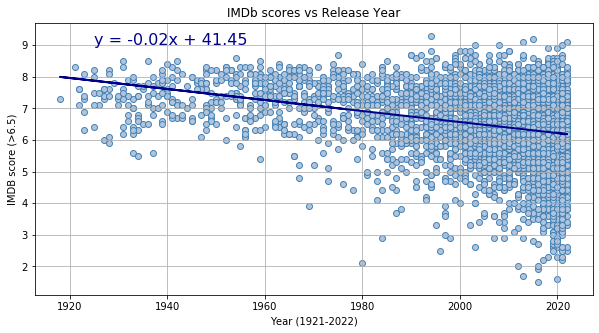

In [32]:
x_value = filtered_movie["release_year"]
y_value = filtered_movie["imdb_score"]
plt.figure(figsize=(10,5))
plt.scatter(x_value,y_value, marker="o", color="lightsteelblue", edgecolors="steelblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"darkblue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1925,9),color="darkblue",fontsize=16)
plt.title("IMDb scores vs Release Year")
plt.xlabel("Year (1921-2022)")
plt.ylabel("IMDB score (>6.5)")
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("Output/year_vs_score.png")
plt.show()

There is a weak correlation between older movies being rated higher than newer movies

In [33]:
filtered_old = filtered_movie[filtered_movie["release_year"]<2005]
filtered_old

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,release_year,imdb_score,imdb_votes
0,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,1976,8.2,808582.0
1,tm154986,1.0,0.0,0.0,Deliverance,MOVIE,R,109,1972,7.7,107673.0
2,tm127384,1.0,0.0,0.0,Monty Python and the Holy Grail,MOVIE,PG,91,1975,8.2,534486.0
4,tm120801,1.0,0.0,0.0,The Dirty Dozen,MOVIE,NaN,150,1967,7.7,72662.0
5,tm70993,1.0,0.0,0.0,Life of Brian,MOVIE,R,94,1979,8.0,395024.0
...,...,...,...,...,...,...,...,...,...,...,...
6173,tm146332,0.0,0.0,1.0,Salt Lake 2002: Stories of Olympic Glory,MOVIE,NaN,120,2003,6.6,63.0
6178,tm144406,0.0,0.0,1.0,Dennis Miller: The Raw Feed,MOVIE,NaN,60,2003,5.6,304.0
6183,tm364871,0.0,0.0,1.0,Sydney 2000: Stories of Olympic Glory,MOVIE,NaN,116,2001,6.8,63.0
7053,tm364104,0.0,0.0,1.0,The IX Olympiad in Amsterdam,MOVIE,NaN,251,1928,5.9,52.0


In [34]:
filtered_new = filtered_movie[filtered_movie["release_year"]>=2005]
filtered_new

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,release_year,imdb_score,imdb_votes
175,tm74402,1.0,0.0,0.0,The Mist,MOVIE,R,126,2007,7.1,305346.0
180,tm92641,1.0,0.0,0.0,Inception,MOVIE,PG-13,148,2010,8.8,2294231.0
181,tm27911,1.0,0.0,0.0,The Departed,MOVIE,R,151,2006,8.5,1296244.0
182,tm88465,1.0,0.0,0.0,Insidious,MOVIE,PG-13,103,2010,6.8,303820.0
183,tm172683,1.0,0.0,0.0,War of the Worlds,MOVIE,PG-13,117,2005,6.5,444229.0
...,...,...,...,...,...,...,...,...,...,...,...
7082,tm832366,0.0,0.0,1.0,Shakira in Concert: El Dorado World Tour,MOVIE,NaN,122,2019,7.8,260.0
7083,tm949799,0.0,0.0,1.0,Territorio,MOVIE,NaN,94,2020,5.8,146.0
7084,tm825662,0.0,0.0,1.0,Return to the Moon,MOVIE,PG,1,2019,8.0,13.0
7085,tm483047,0.0,0.0,1.0,Sterling,MOVIE,NaN,20,2019,7.3,20.0


The r value is: -0.27


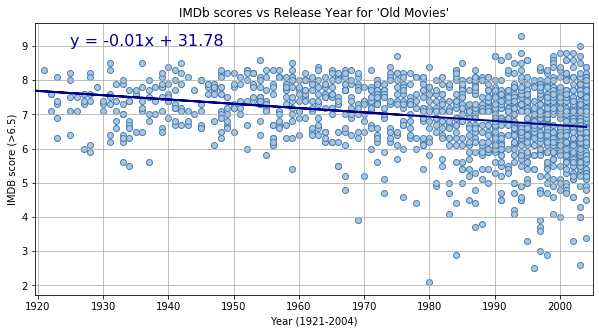

Movie Count: 1411


In [35]:
x_value = filtered_old["release_year"]
y_value = filtered_old["imdb_score"]
plt.figure(figsize=(10,5))
plt.scatter(x_value,y_value, marker="o", color="lightsteelblue", edgecolors="steelblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"darkblue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1925,9),color="darkblue",fontsize=16)
plt.title("IMDb scores vs Release Year for 'Old Movies'")
plt.xlabel("Year (1921-2004)")
plt.ylabel("IMDB score (>6.5)")
plt.xlim(1919.5,2005)
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("Output/old_release_vs_score.png")
plt.show()
print(f"Movie Count: {len(filtered_old)}")

The r value is: -0.14


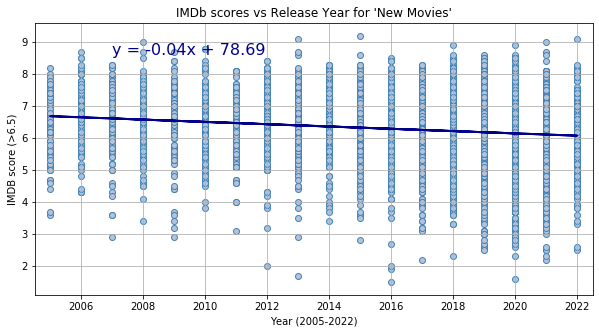

Movie Count: 5046


In [36]:
x_value = filtered_new["release_year"]
y_value = filtered_new["imdb_score"]
plt.figure(figsize=(10,5))
plt.scatter(x_value,y_value, marker="o", color="lightsteelblue", edgecolors="steelblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"darkblue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(2007,8.6),color="darkblue",fontsize=16)
plt.title("IMDb scores vs Release Year for 'New Movies'")
plt.xlabel("Year (2005-2022)")
plt.ylabel("IMDB score (>6.5)")
plt.xlim(2004.5,2022.5)
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("Output/new_release_vs_score.png")
plt.show()
print(f"Movie Count: {len(filtered_new)}")